## Final Project Submission

Please fill out:
* Student names: Allan Ofula, Pamela Godia, James G. Gatonye and Brian Waweru
* Student pace: Part-Time
* Scheduled project review date/time: 
* Instructor name: Mildred Jepkosgei 
* Blog post URL:

# MOVIE INDUSTRY BUSINESS ANALYSIS PROJECT

## Project Overview
In this project, we will utilize data cleaning, imputation, exploratory Statistical data analysis (EDA), SQL and visualization to generate actionable insights for business stakeholders in the film industry.

## Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Data
The analysis focusess on analyzing multiple datasets sourced from industry databases below. These datasets provide information on movie budgets, box office earnings, critical ratings, and audience scores. The datasets include:

- IMDb SQLite Database – Metadata on movies, including genres, directors, and release years.

- Box Office Mojo (CSV) – Domestic and international box office revenue.

- Rotten Tomatoes (TSV) – Movie reviews, critics' ratings, and audience scores.

- The Movie Database (TMDb) (CSV) – Movie details and ratings.

- The Numbers (CSV) – Budget vs. revenue comparisons.

# Objective
This analysis aims to identify trends and patterns in the film industry, such as the most profitable movie genres, the relationship between budget and revenue, and the impact of critic and audience ratings on box office performance. By leveraging Statistical analysis tools to clean and analyze the data, providing visual insights to help stakeholders make informed business decisions.

## 1. Loading & Inspecting Data

In [4]:
# Your code here - remember to use markdown cells for comments as well!

import zipfile
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [5]:
# Loading dataset

db_path = "im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("SELECT type, name FROM sqlite_master;")
objects = cursor.fetchall()

print("Database objects:", objects)


Database objects: [('table', 'movie_basics'), ('table', 'directors'), ('table', 'known_for'), ('table', 'movie_akas'), ('table', 'movie_ratings'), ('table', 'persons'), ('table', 'principals'), ('table', 'writers')]


In [6]:
# Checking  sample of the dataset
df_movies = pd.read_sql("SELECT * FROM movie_basics LIMIT 5;", conn)
print(df_movies)

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018             86.0          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [7]:
df_movies.describe()

,start_year,runtime_minutes
count,5.000000,5.000000
mean,2017.000000,115.400000
std,2.345208,37.799471
min,2013.000000,80.000000
25%,2017.000000,86.000000
50%,2018.000000,114.000000
75%,2018.000000,122.000000
max,2019.000000,175.000000


In [8]:
# Loading CSV files
df_box_office = pd.read_csv("bom.movie_gross.csv")
df_tmdb_movies = pd.read_csv("tmdb.movies.csv")
df_movie_budgets = pd.read_csv("tn.movie_budgets.csv")

# Displaying first few rows
print("Box Office Data:")
display(df_box_office.head())

print("TMDB Movies Data:")
display(df_tmdb_movies.head())

print("Movie Budgets Data:")
display(df_movie_budgets.head())

Box Office Data:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


TMDB Movies Data:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Movie Budgets Data:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
print("Box Office Data:")
display(df_box_office.describe())

print("TMDB Movies Data:")
display(df_tmdb_movies.describe())

print("Movie Budgets Data:")
display(df_movie_budgets.describe())

Box Office Data:


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


TMDB Movies Data:


,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


Movie Budgets Data:


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


# Connecting to database
with sqlite3.connect(db_path) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print("Tables in database:", tables)
    
table_name = "movie_basics"  
df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
print(df.head())

In [11]:
# Loading TSV files 
df_movie_info = pd.read_csv("rt.movie_info.tsv", sep="\t", encoding="latin1")
df_reviews = pd.read_csv("rt.reviews.tsv", sep="\t", encoding="latin1")


# Displaying first few rows
print("Movie Info Data:")
display(df_movie_info.head())

print("Reviews Data:")
display(df_reviews.head())

Movie Info Data:


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Reviews Data:


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 1.1 Checking For Missing Values

In [13]:
# Checking missing values
def check_missing_values(df, name):
    print(f"\n🔍 Missing values in {name}:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])  # Show only columns with missing values

# Check for missing values
check_missing_values(df_box_office, "Box Office Data")
check_missing_values(df_tmdb_movies, "TMDb Movies Data")
check_missing_values(df_movie_budgets, "Movie Budgets Data")



🔍 Missing values in Box Office Data:
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64

🔍 Missing values in TMDb Movies Data:
Series([], dtype: int64)

🔍 Missing values in Movie Budgets Data:
Series([], dtype: int64)


- We will drop rows with missing studio & domestic_gross since they’re few and fill foreign_gross with 0 or median since 1350 is a lot of data

In [15]:
# Checking for missing values
print("Missing Values:\n")
print("Movie Info:\n", df_movie_info.isnull().sum(), "\n")
print("Reviews:\n", df_reviews.isnull().sum(), "\n")

Missing Values:

Movie Info:
 id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64 

Reviews:
 id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64 



In [16]:
# Connect to SQLite database
db_path = "im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Getting all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]

# Fetching column names for a table
def get_columns(table_name):
    cursor.execute(f"PRAGMA table_info({table_name});")
    return [col[1] for col in cursor.fetchall()]

# Counting NULL values in each column of a table
def check_missing_values(table_name):
    columns = get_columns(table_name)
    if not columns:
        return None
    
    query = f"""
    SELECT 
        COUNT(*) AS total_rows, 
        {", ".join([f"SUM(CASE WHEN {col} IS NULL THEN 1 ELSE 0 END) AS missing_{col}" for col in columns])}
    FROM {table_name};
    """
    cursor.execute(query)
    return cursor.fetchall(), columns

# Checking for missing values in all tables
for table in tables:
    print(f"\n🔹 Checking missing values in {table} 🔹")
    missing_data, columns = check_missing_values(table)

    if missing_data:
        df_missing = pd.DataFrame(missing_data, columns=["total_rows"] + [f"missing_{col}" for col in columns])
        print(df_missing)
    else:
        print(f"⚠ No columns found in {table}")


🔹 Checking missing values in movie_basics 🔹
   total_rows  missing_movie_id  missing_primary_title  \
0      146144                 0                      0   

   missing_original_title  missing_start_year  missing_runtime_minutes  \
0                      21                   0                        0   

   missing_genres  
0               0  

🔹 Checking missing values in directors 🔹
   total_rows  missing_movie_id  missing_person_id
0      291174                 0                  0

🔹 Checking missing values in known_for 🔹
   total_rows  missing_person_id  missing_movie_id
0     1638260                  0                 0

🔹 Checking missing values in movie_akas 🔹
   total_rows  missing_movie_id  missing_ordering  missing_title  \
0      331703                 0                 0              0   

   missing_region  missing_language  missing_types  missing_attributes  \
0               0            289988         163256              316778   

   missing_is_original_title  
0

**Missing Values**

- **movie_basics:** original_title → 21 missing, runtime_minutes → 31,739 missing, genre → 5,408 missing

- **movie_akas:** region → 53,293 missing, language → 289,988 missing, types → 163,256 missing, attributes → 316,778 missing

- **persons:** birth_year → 523,912 missing, death_year → 599,865 missing, primary_profession → 51,340 missing

- **principals:** job → 850,502 missing, characters → 634,826 missing

## 1.2 Handling Missing Values

Since there are only 5 missing studio values and 28 missing domestic_gross values, we drop the rows.

In [20]:
df_box_office.dropna(subset=["studio", "domestic_gross"], inplace=True)

Since 1350 missing values is a significant amount, we will fill them with the median 

In [22]:
df_box_office["foreign_gross"] = df_box_office["foreign_gross"].replace(",", "", regex=True).astype(float)
df_box_office["foreign_gross"].fillna(df_box_office["foreign_gross"].median(), inplace=True)

In [23]:
# Checking handled missing values

# To confirm no missing values
print(df_box_office["foreign_gross"].dtype)  
print(df_box_office.isnull().sum())  

float64
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [24]:
# Connect to database
db_path = "im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Dictionary of missing value fixes
fix_queries = [
    # movie_basics
    "UPDATE movie_basics SET runtime_minutes = (SELECT ROUND(AVG(runtime_minutes), 0) FROM movie_basics WHERE runtime_minutes IS NOT NULL) WHERE runtime_minutes IS NULL;",
    "UPDATE movie_basics SET genres = 'Unknown' WHERE genres IS NULL;",
    
    # movie_akas
    "UPDATE movie_akas SET region = 'Unknown' WHERE region IS NULL;",
    "UPDATE movie_akas SET is_original_title = 0 WHERE is_original_title IS NULL;",

    # persons
    "UPDATE persons SET primary_profession = 'Unknown' WHERE primary_profession IS NULL;",

    # principals
    "UPDATE principals SET job = 'Unknown' WHERE job IS NULL;",
    "UPDATE principals SET characters = 'Not Specified' WHERE characters IS NULL;"
]

# Executing each fix
for query in fix_queries:
    cursor.execute(query)

# Committing changes 
conn.commit()

print("Missing values handled successfully!")


Missing values handled successfully!


In [25]:
# Tables and columns to check for missing values
tables_to_check = {
    "movie_basics": ["runtime_minutes", "genres"],
    "movie_akas": ["region"],
    "persons": ["primary_profession"],
    "principals": ["job", "characters"]
}

# Checking for missing values
for table, columns in tables_to_check.items():
    for column in columns:
        query = f"SELECT COUNT(*) FROM {table} WHERE {column} IS NULL;"
        cursor.execute(query)
        missing_count = cursor.fetchone()[0]
        print(f"🔹 Missing values in {table}.{column}: {missing_count}")


🔹 Missing values in movie_basics.runtime_minutes: 0
🔹 Missing values in movie_basics.genres: 0
🔹 Missing values in movie_akas.region: 0
🔹 Missing values in persons.primary_profession: 0
🔹 Missing values in principals.job: 0
🔹 Missing values in principals.characters: 0


In [26]:
for table in tables:
    print(f"\n🔹 Data Types in {table}:")
    cursor.execute(f"PRAGMA table_info({table});")
    columns_info = cursor.fetchall()
    for col in columns_info:
        print(f"{col[1]} - {col[2]}")  # Column Name - Data Type


🔹 Data Types in movie_basics:
movie_id - TEXT
primary_title - TEXT
original_title - TEXT
start_year - INTEGER
runtime_minutes - REAL
genres - TEXT

🔹 Data Types in directors:
movie_id - TEXT
person_id - TEXT

🔹 Data Types in known_for:
person_id - TEXT
movie_id - TEXT

🔹 Data Types in movie_akas:
movie_id - TEXT
ordering - INTEGER
title - TEXT
region - TEXT
language - TEXT
types - TEXT
attributes - TEXT
is_original_title - REAL

🔹 Data Types in movie_ratings:
movie_id - TEXT
averagerating - REAL
numvotes - INTEGER

🔹 Data Types in persons:
person_id - TEXT
primary_name - TEXT
birth_year - REAL
death_year - REAL
primary_profession - TEXT

🔹 Data Types in principals:
movie_id - TEXT
ordering - INTEGER
person_id - TEXT
category - TEXT
job - TEXT
characters - TEXT

🔹 Data Types in writers:
movie_id - TEXT
person_id - TEXT


In [27]:
# Checking if a column exists in a table
def column_exists(table_name, column_name):
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = [col[1] for col in cursor.fetchall()]
    return column_name in columns

tables_to_check = ["movie_basics", "directors", "known_for", "movie_akas", "movie_ratings", "persons", "principals", "writers"]

for table in tables_to_check:
    # Checking for movie_id
    if column_exists(table, "movie_id"):
        cursor.execute(f"SELECT movie_id FROM {table} WHERE movie_id NOT GLOB '[0-9]*' LIMIT 5;")
        non_numeric_ids = cursor.fetchall()
        print(f"🔹 Non-numeric movie_id in {table}: {non_numeric_ids}")

    # Checking for person_id
    if column_exists(table, "person_id"):
        cursor.execute

🔹 Non-numeric movie_id in movie_basics: [('tt0063540',), ('tt0066787',), ('tt0069049',), ('tt0069204',), ('tt0100275',)]
🔹 Non-numeric movie_id in directors: [('tt0285252',), ('tt0462036',), ('tt0835418',), ('tt0835418',), ('tt0878654',)]
🔹 Non-numeric movie_id in known_for: [('tt0837562',), ('tt2398241',), ('tt0844471',), ('tt0118553',), ('tt0896534',)]
🔹 Non-numeric movie_id in movie_akas: [('tt0369610',), ('tt0369610',), ('tt0369610',), ('tt0369610',), ('tt0369610',)]
🔹 Non-numeric movie_id in movie_ratings: [('tt10356526',), ('tt10384606',), ('tt1042974',), ('tt1043726',), ('tt1060240',)]
🔹 Non-numeric movie_id in principals: [('tt0111414',), ('tt0111414',), ('tt0111414',), ('tt0323808',), ('tt0323808',)]
🔹 Non-numeric movie_id in writers: [('tt0285252',), ('tt0438973',), ('tt0438973',), ('tt0462036',), ('tt0835418',)]


In [28]:
# Checking if person_id is non-numeric
for table in ["persons", "directors", "known_for", "principals", "writers"]:
    if column_exists(table, "person_id"):
        query = f"SELECT person_id FROM {table} WHERE person_id NOT GLOB 'nm[0-9]*' LIMIT 5;"
        cursor.execute(query)
        non_numeric_pids = cursor.fetchall()
        print(f"🔹 Non-numeric person_id in {table}: {non_numeric_pids}")


🔹 Non-numeric person_id in persons: []
🔹 Non-numeric person_id in directors: []
🔹 Non-numeric person_id in known_for: []
🔹 Non-numeric person_id in principals: []
🔹 Non-numeric person_id in writers: []


In [29]:
# Columns to check
year_columns = {
    "movie_basics": ["start_year"],
    "persons": ["birth_year", "death_year"]
}

# Checking for non-numeric values
for table, columns in year_columns.items():
    for column in columns:
        query = f"SELECT {column} FROM {table} WHERE {column} NOT GLOB '[0-9]*' LIMIT 5;"
        cursor.execute(query)
        invalid_years = cursor.fetchall()
        print(f"🔹 Non-numeric values in {table}.{column}: {invalid_years}")


🔹 Non-numeric values in movie_basics.start_year: []
🔹 Non-numeric values in persons.birth_year: []
🔹 Non-numeric values in persons.death_year: []


# 1.3 Handling Duplicates in the Data

In [31]:
#Checking for Duplicates in the DataFrame

print(f"🔍 Duplicates in Box Office Data: {df_box_office.duplicated().sum()}")
print(f"🔍 Duplicates in TMDb Movies Data: {df_tmdb_movies.duplicated().sum()}")
print(f"🔍 Duplicates in Movie Budgets Data: {df_movie_budgets.duplicated().sum()}")

🔍 Duplicates in Box Office Data: 0
🔍 Duplicates in TMDb Movies Data: 0
🔍 Duplicates in Movie Budgets Data: 0


In [32]:
 # Checking for leading/trailing spaces & inconsistent casing:
df_box_office["title"] = df_box_office["title"].str.strip().str.lower()
df_box_office["studio"] = df_box_office["studio"].str.strip().str.lower()

In [33]:
# Counting occurrences of each title
df_box_office["title"].value_counts().head(10)

title
bluebeard                    2
toy story 3                  1
salut d'amour                1
love forecast                1
out 1, noli me tangere       1
3 1/2 minutes, 10 bullets    1
paulette                     1
the cut                      1
the keeping room             1
big game                     1
Name: count, dtype: int64

In [34]:
df_box_office[df_box_office["title"] == "bluebeard"]

,title,studio,domestic_gross,foreign_gross,year
317,bluebeard,strand,33500.0,5200.0,2010
3045,bluebeard,wgusa,43100.0,19400000.0,2017


In [35]:
# Differentiating the titles Bluebeard by adding the release year
df_box_office["title"] = df_box_office["title"] + " (" + df_box_office["year"].astype(str) + ")"
df_box_office["title"].value_counts()[df_box_office["title"].value_counts() > 1]

Series([], Name: count, dtype: int64)

# 2.0 Exploratory Statistical Analysis

We will perform Statistical analysis of our dataset to answer the below identified questions to help address the business problem and help make informed decision:

**1. Which film genres generate the highest box office revenue and profitability?** → to helps decide which  movie genres to prioritize.

**2. What budget range balances cost and box office returns?** → to help ensure efficient budget allocation for maximum profitability.

**3. How do critic and audience ratings correlate with box office success?** → to help determines whether how movie ratings influence revenue.

**4. What is the best time of year to release a blockbuster for maximum earnings?** → to helps with strategic time release or scheduling

**5. How does marketing spend impact box office revenue?** → to help guides marketing budget allocation.

## 2.1 Which film genres generate the highest box office revenue and profitability
- We merge movie_basics (from SQLite: contains genre info), bom.movie_gross.csv (Box office revenue: domestic & foreign) and tn.movie_budgets.csv datasets (Production budget & total revenue)

### 2.2.1 Merging Tables from different datasets for Analysis

In [40]:
# Merging IMDb genres with box office and budget data

df = df_movies.merge(df_box_office, left_on='primary_title', right_on='title', how='inner')
df = df.merge(df_movie_budgets, left_on='primary_title', right_on='movie', how='inner')
print(df_box_office.head())
print(df_movie_budgets.head())

                                               title studio  domestic_gross  \
0                                 toy story 3 (2010)     bv     415000000.0   
1                  alice in wonderland (2010) (2010)     bv     334200000.0   
2  harry potter and the deathly hallows part 1 (2...     wb     296000000.0   
3                                   inception (2010)     wb     292600000.0   
4                         shrek forever after (2010)   p/dw     238700000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
4    513900000.0  2010  
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star

### 2.2.2 Cleaning and Exploring Merged Tables

In [42]:
# Cleaning Up df_movie_budgets to remove '$' and ',' from the budget and revenue columns before merging correctly

df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].str.replace('[$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].str.replace('[$,]', '', regex=True).astype(float)
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].str.replace('[$,]', '', regex=True).astype(float)

In [43]:
# Standardizing the data and removing whitspaces

df_box_office['title'] = df_box_office['title'].str.lower().str.strip()
df_movie_budgets['movie'] = df_movie_budgets['movie'].str.lower().str.strip()

In [44]:
# Dropping duplicates before merging
df_box_office = df_box_office.drop_duplicates(subset=['title'])
df_movie_budgets = df_movie_budgets.drop_duplicates(subset=['movie'])

In [45]:
# Merging df_box_office and df_movie_budgets using title and movie
import re

# Removing year from titles
def clean_title(title):
    return re.sub(r'\s*\(\d{4}\)\s*', '', title) 

# Applying function to df_box_office
df_box_office['title'] = df_box_office['title'].apply(clean_title)

# Merging
df_combined = df_box_office.merge(df_movie_budgets, left_on='title', right_on='movie', how='inner')

# Results
print(df_combined[['title', 'movie', 'domestic_gross_x', 'domestic_gross_y']].head())

                        title                       movie  domestic_gross_x  \
0                 toy story 3                 toy story 3       415000000.0   
1         alice in wonderland         alice in wonderland       334200000.0   
2                   inception                   inception       292600000.0   
3         shrek forever after         shrek forever after       238700000.0   
4  the twilight saga: eclipse  the twilight saga: eclipse       300500000.0   

   domestic_gross_y  
0       415004880.0  
1       334191110.0  
2       292576195.0  
3       238736787.0  
4       300531751.0  


In [46]:
# Prioritizing one column to avoid duplicate columns

df_combined['domestic_gross'] = df_combined['domestic_gross_x'].fillna(df_combined['domestic_gross_y'])
df_combined.drop(columns=['domestic_gross_x', 'domestic_gross_y'], inplace=True)
print(df_combined.isnull().sum())
print(df_combined.dtypes)

title                0
studio               0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
worldwide_gross      0
domestic_gross       0
dtype: int64
title                 object
studio                object
foreign_gross        float64
year                   int64
id                     int64
release_date          object
movie                 object
production_budget    float64
worldwide_gross      float64
domestic_gross       float64
dtype: object


In [47]:
# Converting foreign_gross to numeric and sort missing values

df_combined['foreign_gross'] = (
    df_combined['foreign_gross']
    .replace(',', '', regex=True)  # Removing commas
    .apply(pd.to_numeric, errors='coerce')  # Converting to float, setting errors to NaN
    .fillna(0)  # Replacing NaNs with 0
)

# Handling missing values in studio
df_combined['studio'].fillna('Unknown', inplace=True)

print(df_combined.isnull().sum())  
print(df_combined.dtypes)

title                0
studio               0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
worldwide_gross      0
domestic_gross       0
dtype: int64
title                 object
studio                object
foreign_gross        float64
year                   int64
id                     int64
release_date          object
movie                 object
production_budget    float64
worldwide_gross      float64
domestic_gross       float64
dtype: object


### 2.2.3 Calculating total revenue and profitability

In [49]:
# Calculating Total Revenue (Worldwide Gross)
df_combined['total_revenue'] = df_combined['domestic_gross'] + df_combined['foreign_gross']

# Calculating Profit (Revenue - Budget)
df_combined['profit'] = df_combined['total_revenue'] - df_combined['production_budget']

# Calculating Profit Margin (%)
df_combined['profit_margin'] = (df_combined['profit'] / df_combined['production_budget']) * 100

# Display first few rows
print(df_combined[['title', 'production_budget', 'domestic_gross', 'foreign_gross', 'total_revenue', 'profit', 'profit_margin']].head())


                        title  production_budget  domestic_gross  \
0                 toy story 3        200000000.0     415000000.0   
1         alice in wonderland        200000000.0     334200000.0   
2                   inception        160000000.0     292600000.0   
3         shrek forever after        165000000.0     238700000.0   
4  the twilight saga: eclipse         68000000.0     300500000.0   

   foreign_gross  total_revenue       profit  profit_margin  
0    652000000.0   1.067000e+09  867000000.0     433.500000  
1    691300000.0   1.025500e+09  825500000.0     412.750000  
2    535700000.0   8.283000e+08  668300000.0     417.687500  
3    513900000.0   7.526000e+08  587600000.0     356.121212  
4    398000000.0   6.985000e+08  630500000.0     927.205882  


### 2.2.4 Identifying the most profitable movies

In [51]:
# Sorting movies by profit in descending order
most_profitable_movies = df_combined.sort_values(by='profit', ascending=False).head(10)

# Displaying the top 10 most profitable movies
print(most_profitable_movies[['title', 'profit', 'profit_margin', 'total_revenue']])

                               title        profit  profit_margin  \
1305                   black panther  1.147000e+09     573.500000   
1306  jurassic world: fallen kingdom  1.139500e+09     670.294118   
543                           frozen  1.126400e+09     750.933333   
1177            beauty and the beast  1.103500e+09     689.687500   
861                          minions  1.085400e+09    1466.756757   
860          avengers: age of ultron  1.074800e+09     325.105868   
1307                   incredibles 2  1.042800e+09     521.400000   
544                       iron man 3  1.014800e+09     507.400000   
1308                         aquaman  9.878000e+08     617.375000   
1179                 despicable me 3  9.598000e+08    1279.733333   

      total_revenue  
1305   1.347000e+09  
1306   1.309500e+09  
543    1.276400e+09  
1177   1.263500e+09  
861    1.159400e+09  
860    1.405400e+09  
1307   1.242800e+09  
544    1.214800e+09  
1308   1.147800e+09  
1179   1.034800e+09 

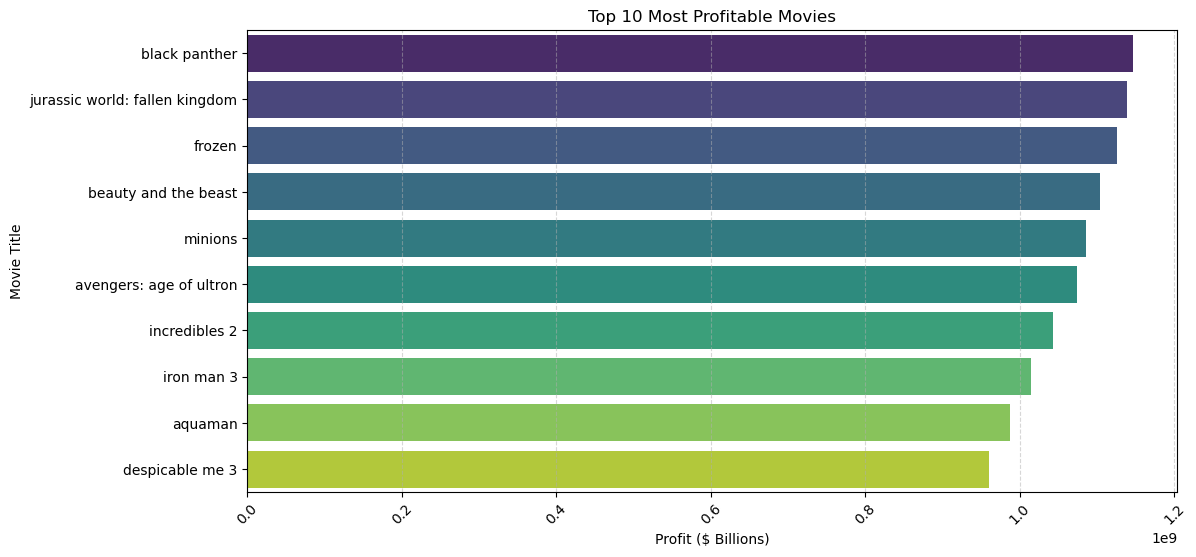

In [52]:
# Sorting movies by profit in descending order
most_profitable_movies = df_combined.sort_values(by='profit', ascending=False).head(10)

# Plotting Top 10 Most Profitable Movies 
plt.figure(figsize=(12, 6))
sns.barplot(
    x='profit', 
    y='title', 
    data=most_profitable_movies, 
    palette='viridis'
)

plt.xlabel('Profit ($ Billions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Profitable Movies')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Display 
plt.show()

- The chart highlights the top 10 most profitable movies, with Black Panther leading, followed by Jurassic World: Fallen Kingdom and Frozen. Disney and major franchises dominate the list, particularly superhero (Black Panther, Iron Man 3, Aquaman) and animated films (Frozen, Minions, Incredibles 2). Many of these movies achieved nearly $1 billion in profit, showcasing the strong financial success of blockbuster films, especially animated ones with broad global appeal.

- This highlights how superhero and animated films tend to be the most profitable genres, benefiting from strong brand recognition, global appeal, and franchise power.

### 2.2.5 Identifying least profitable movies or movies with losses

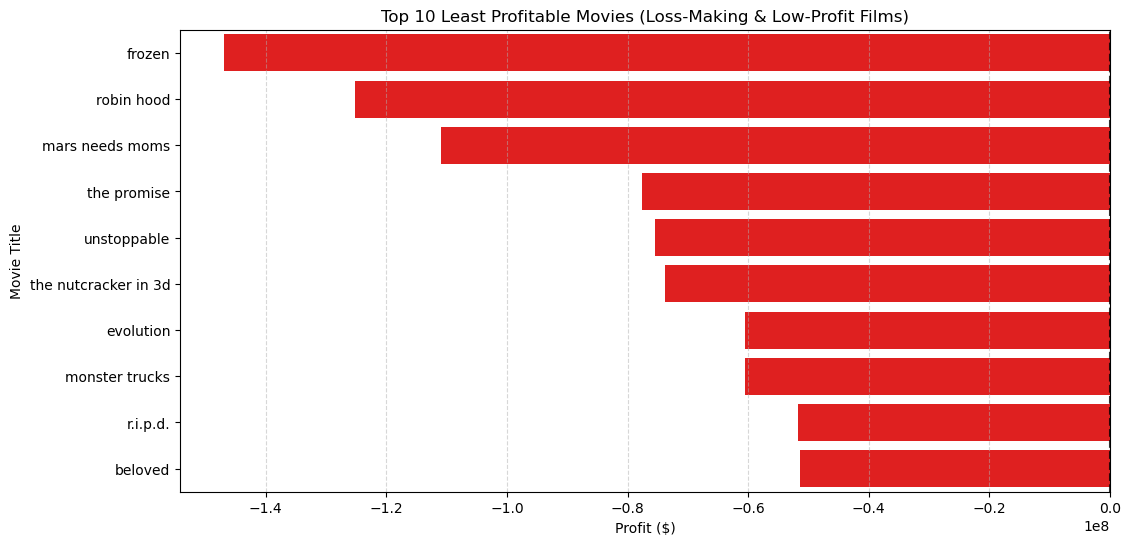

In [55]:
# Sorting movies by profit in ascending order 
least_profitable_movies = df_combined.sort_values(by='profit', ascending=True).head(10)

# Plotting Top 10 least Profitable Movies
plt.figure(figsize=(12, 6))
sns.barplot(
    x='profit', 
    y='title', 
    data=least_profitable_movies, 
    palette=['red' if x < 0 else 'orange' for x in least_profitable_movies['profit']]
)

# Labels & Title
plt.xlabel('Profit ($)')
plt.ylabel('Movie Title')
plt.title('Top 10 Least Profitable Movies (Loss-Making & Low-Profit Films)')
plt.axvline(0, color='black', linestyle='--', alpha=0.8)  
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Display 
plt.show()

- The bar chart presents the Top 10 Least Profitable Movies, highlighting films that incurred significant financial losses. Frozen and Robin Hood recorded the highest losses, followed by Mars Needs Moms, which also performed poorly. The list includes a mix of animated (Mars Needs Moms, The Nutcracker in 3D), action (Robin Hood, R.I.P.D.), and fantasy films (Monster Trucks). The negative profits suggest high production and marketing costs that were not recovered through box office earnings, emphasizing the risks of big-budget films failing to attract audiences.

### 2.2.6 Aggregating data to find the most profitable genre

In [58]:
# Merging df_movie_info with df_combined on id
df_combined = df_combined.merge(
    df_movie_info[['id', 'genre']], 
    on='id', 
    how='left'
)

In [59]:
# Splitting and exploding  multiple genres per movie
df_genres = df_combined.assign(genre=df_combined['genre'].str.split(', '))
df_genres = df_genres.explode('genre')

# Aggregating data per genre
genre_profitability = df_genres.groupby('genre').agg(
    total_movies=('title', 'count'),
    total_revenue=('total_revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_profit_margin=('profit_margin', 'mean')
).reset_index()

# Sorting by total profit
genre_profitability = genre_profitability.sort_values(by='total_profit', ascending=False)

# Displaying the top 10 most profitable genres
print(genre_profitability.head(10))

                                                genre  total_movies  \
37                                              Drama           131   
25                                             Comedy            97   
26                                       Comedy|Drama            89   
45                                             Horror            51   
34                                     Comedy|Romance            46   
9   Action and Adventure|Drama|Science Fiction and...            36   
15  Art House and International|Classics|Horror|My...            13   
32                 Comedy|Musical and Performing Arts            26   
47                               Mystery and Suspense            32   
11          Action and Adventure|Mystery and Suspense            29   

    total_revenue  total_profit  avg_profit_margin  
37   2.334681e+10  1.673426e+10         460.635296  
25   1.665265e+10  1.177700e+10         313.838883  
26   1.215549e+10  8.182997e+09         420.559960  
45   6

### 2.2.7 Confidence Intervals for Revenue by genre

In [61]:
# Calculating confidence Intervals for Revenue by genre
def compute_confidence_intervals(df, value_column, group_column, confidence=0.95):
    results = []

    for group, subset in df.groupby(group_column):
        data = subset[value_column].dropna()  # Removing NaNs
        if len(data) > 1:  # Ensuring there is enough data for a confidence interval
            mean = np.mean(data)
            sem = stats.sem(data)  # Standard Error of the Mean
            margin = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)  # Margin of error
            lower = mean - margin
            upper = mean + margin
            results.append((group, mean, lower, upper))
    
    return pd.DataFrame(results, columns=[group_column, 'Mean', 'Lower CI', 'Upper CI'])

# computing confidence intervals for revenue by genre
confidence_intervals_revenue = compute_confidence_intervals(df_combined, 'worldwide_gross', 'genre')

# Results
print(confidence_intervals_revenue.head(10))

                                               genre          Mean  \
0                               Action and Adventure  1.402616e+08   
1  Action and Adventure|Art House and Internation...  7.771324e+07   
2                Action and Adventure|Classics|Drama  8.963719e+07   
3  Action and Adventure|Classics|Drama|Mystery an...  1.623432e+08   
4                  Action and Adventure|Comedy|Drama  1.267185e+08   
5   Action and Adventure|Comedy|Mystery and Suspense  1.288358e+08   
6                         Action and Adventure|Drama  1.131452e+08   
7  Action and Adventure|Drama|Horror|Mystery and ...  6.921308e+07   
8    Action and Adventure|Drama|Mystery and Suspense  9.860038e+07   
9  Action and Adventure|Drama|Science Fiction and...  1.429919e+08   

       Lower CI      Upper CI  
0  6.918530e+07  2.113379e+08  
1  3.032272e+07  1.251038e+08  
2  3.320122e+07  1.460732e+08  
3  1.686393e+06  3.230000e+08  
4 -4.030547e+07  2.937424e+08  
5  4.705499e+07  2.106167e+08  
6  2.

- Action and Adventure genres tend to have high mean revenues but also wide confidence intervals, indicating large variations in box office success.
- Mystery and Suspense and Science Fiction and Fantasy seem to perform well when combined with Action and Adventure, which aligns with audience trends.

### 2.2.9 Identifying top 10 most profitable genres

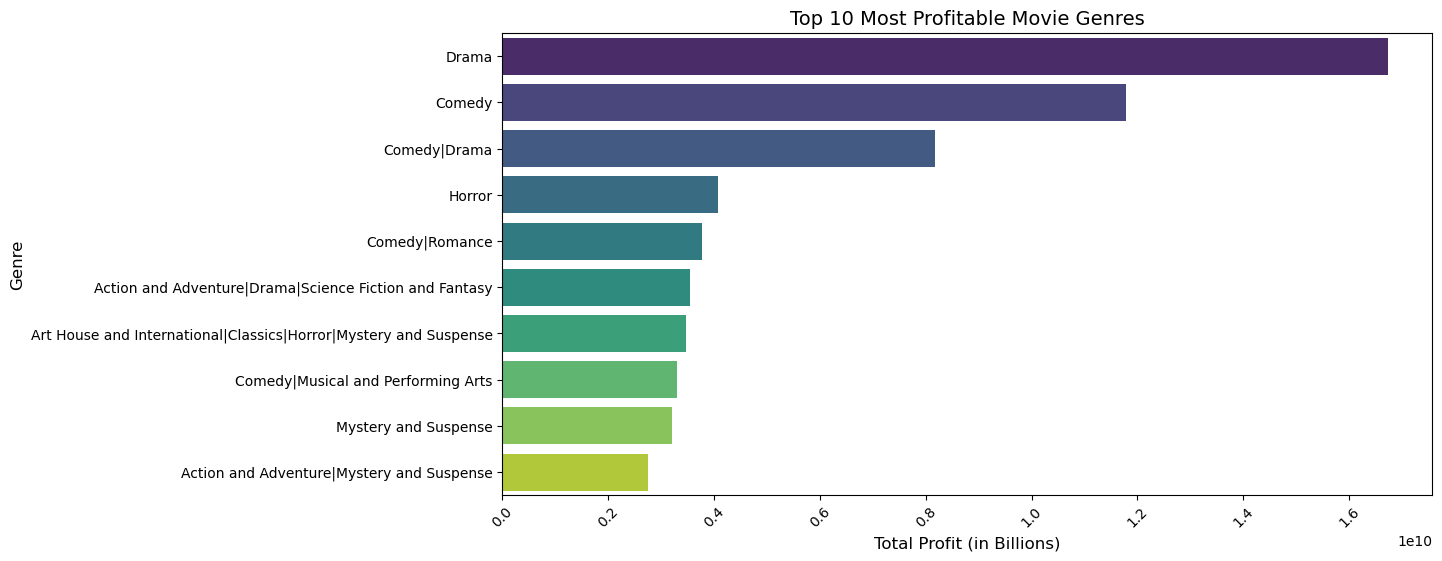

In [64]:
# Selecting top 10 profitable genres
top_genres = genre_profitability.head(10)

# Plotting Top 10 most profitable genre
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_genres, 
    x='total_profit', 
    y='genre', 
    palette='viridis'
)

# Labels and Title
plt.xlabel("Total Profit (in Billions)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Top 10 Most Profitable Movie Genres", fontsize=14)
plt.xticks(rotation=45)

# Display 
plt.show()

- The bar chart presents the Top 10 Most Profitable Movie Genres. Drama recorded the highest profits, followed by Comedy and Comedy|Drama, which also performed exceptionally well. The list includes a mix of Drama, Comedy, Horror, and multi-genre films e.g. Action & Adventure, Drama|Sci-Fi & Fantasy).
- The strong profitability of Horror suggests high returns despite typically lower budgets, while the presence of multi-genre films indicates that blending categories can attract wider audiences. The data underscores the commercial success of Drama and Comedy, as well as the financial viability of suspenseful and adventure-driven

### 2.2.8 Identifying top 10 least profitable genres

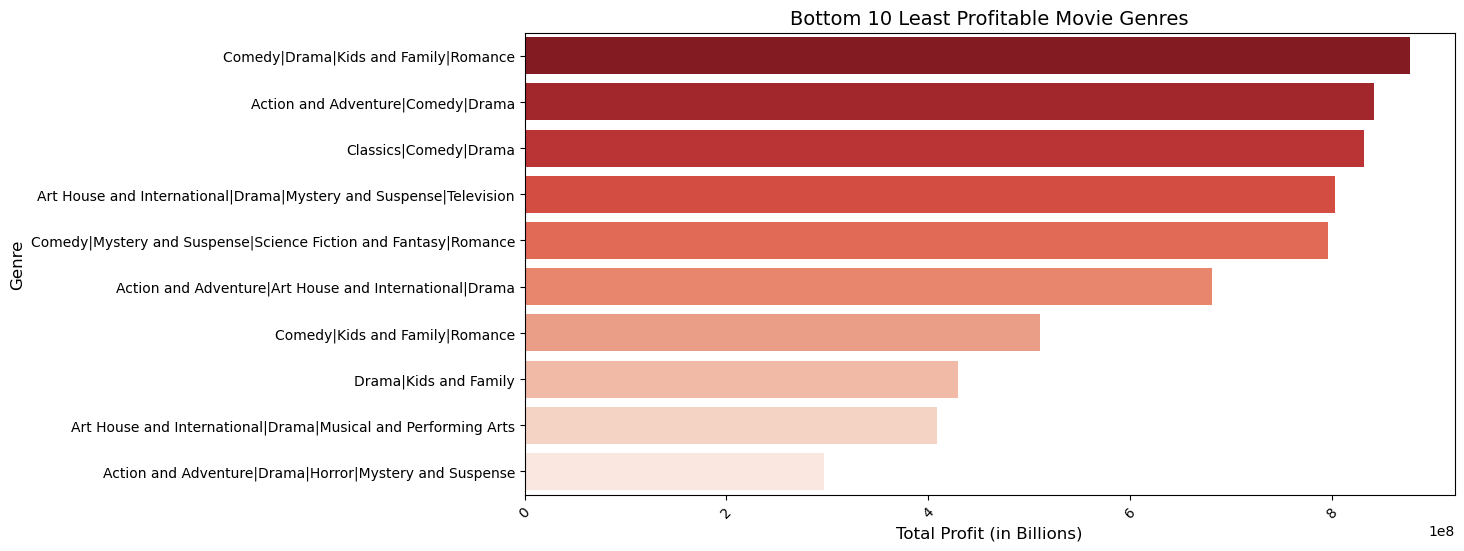

In [67]:
# finding the least profitable genre

# Selecting 10 least profitable genres
least_profitable_genres = genre_profitability.tail(10)

# Plotting top 10 least profitable genre
plt.figure(figsize=(12, 6))
sns.barplot(
    data=least_profitable_genres, 
    x='total_profit', 
    y='genre', 
    palette='Reds_r'
)

# Labels and Title
plt.xlabel("Total Profit (in Billions)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Bottom 10 Least Profitable Movie Genres", fontsize=14)
plt.xticks(rotation=45)

# Display 
plt.show()

- The bar chart presents the Bottom 10 Least Profitable Movie Genres. Comedy|Drama|Kids and Family|Romance recorded the least profitability, followed by Action and Adventure|Comedy|Drama and Classics|Comedy|Drama, which also struggled financially. The list includes a mix of family-oriented, dramatic, and niche genres e.g. Art House and International, Musical and Performing Arts.
- The lower profitability suggests that these genres faced challenges in attracting large audiences or recovering production and marketing costs, highlighting the financial risks associated with multi-genre and niche films.

## 2.2.10 Comparing profit margins across genres over time

In [70]:
# Ensuring only one 'genre' column exists
df_combined = df_combined.drop(columns=['genre_x'], errors='ignore').rename(columns={'genre_y': 'genre'})

# Filling missing genres with 'Unknown' or drop NaN values
df_combined['genre'] = df_combined['genre'].fillna('Unknown')

# Splitting and exploding genres for multiple assignments
df_combined['genre'] = df_combined['genre'].str.split('|')
df_genre_trends = df_combined.explode('genre')

# Display 
print(df_genre_trends[['id', 'title', 'genre']].head())

   id                title                        genre
0  47          toy story 3                      Unknown
1  51  alice in wonderland         Mystery and Suspense
2  38            inception  Art House and International
2  38            inception                     Classics
2  38            inception                       Horror


In [71]:
# Ensuring 'id' is of the same type in both DataFrames
df_movie_info['id'] = df_movie_info['id'].astype(str)
df_combined['id'] = df_combined['id'].astype(str)

# Merging 'genre' from df_movie_info into df_combined
df_combined = df_combined.merge(df_movie_info[['id', 'genre']], on='id', how='left')

# Handling duplicate genre columns
if 'genre_x' in df_combined.columns and 'genre_y' in df_combined.columns:
    df_combined['genre'] = df_combined['genre_y']
    df_combined.drop(columns=['genre_x', 'genre_y'], inplace=True, errors='ignore')

# Filling missing genres with 'Unknown'
df_combined['genre'].fillna('Unknown', inplace=True)

# Splitting genres into multiple rows 
df_combined['genre'] = df_combined['genre'].str.split('|')  
df_combined = df_combined.explode('genre')  

# Confirming changes
print(df_combined[['id', 'title', 'genre']].head())  

   id                title                        genre
0  47          toy story 3                      Unknown
1  51  alice in wonderland         Mystery and Suspense
2  38            inception  Art House and International
2  38            inception                     Classics
2  38            inception                       Horror


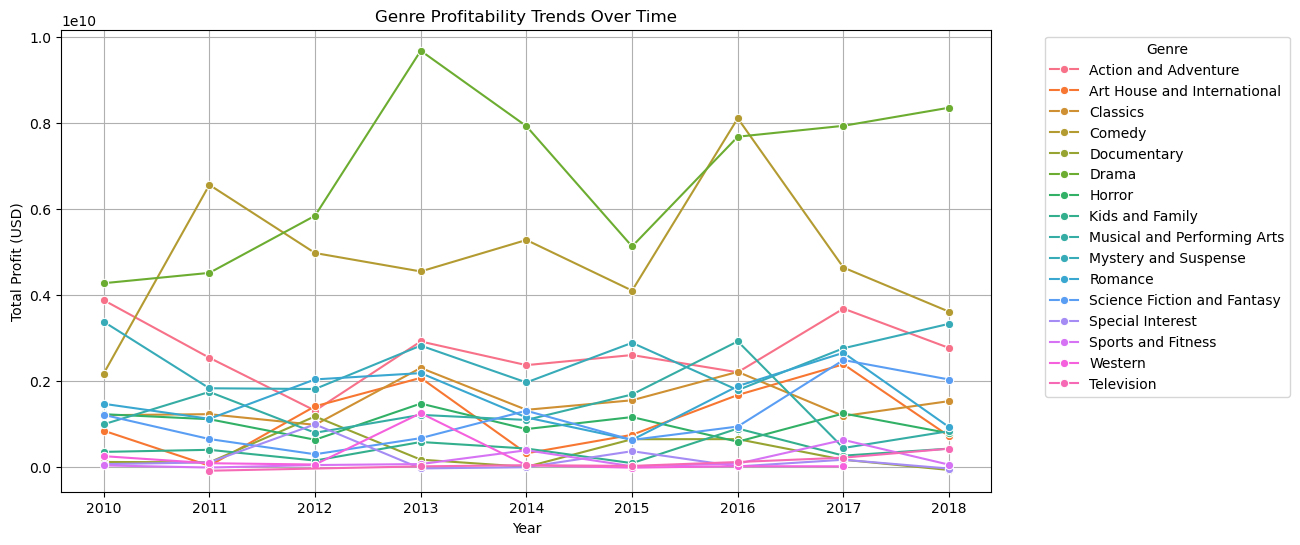

In [72]:
# Ensuring 'year' is numeric for proper sorting
df_combined['year'] = pd.to_numeric(df_combined['year'], errors='coerce')

# Grouping by Year & Genre to calculate total profit per genre per year
df_genre_trends = df_combined.groupby(['year', 'genre'])['profit'].sum().reset_index()

# Filtering out 'Unknown' genre for better insights
df_genre_trends = df_genre_trends[df_genre_trends['genre'] != 'Unknown']

# Plotting genre trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_genre_trends, x='year', y='profit', hue='genre', marker='o')

plt.title('Genre Profitability Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Profit (USD)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display
plt.show()

- The line chart illustrates Genre Profitability Trends Over Time (2010-2018) in (USD) for various movie genres annually.

**Key Observations:**
1. Top Performing Genres:
- Comedy and Drama consistently generated high profits, with notable peaks in 2013 and 2016.
- Action and Adventure and Science Fiction and Fantasy also maintained strong profitability, showing steady or increasing trends.

2. High Volatility:
- Horror and Kids and Family genres experienced fluctuations, with sharp spikes and drops in different years.
- Documentary and Musical & Performing Arts genres had relatively low and inconsistent profits.

3. Steady Low Performers:
- Genres like Special Interest, Sports & Fitness, Western, and Television remained at the lower end of profitability across all years.

4. Peak Years:
- 2013 and 2016 witnessed substantial increases in profitability for multiple genres, particularly Comedy and Drama. A decline is however noticeable in 2017-2018 for some genres.

**Suggestions:**
- Investing in Comedy, Drama, and Action movies appears to be a safer bet due to their consistent profitability.
- Niche genres like Special Interest and Westerns might be riskier investments as they show minimal financial success.

## 2.2 What budget range balances cost and box office returns?
- We aim to determine the optimal budget range that maximizes profitability by analyzing the relationship between production budget and box office returns

### 2.2.1 Visualizing the relationship between budget and box office revenue using regression line to identify trends.

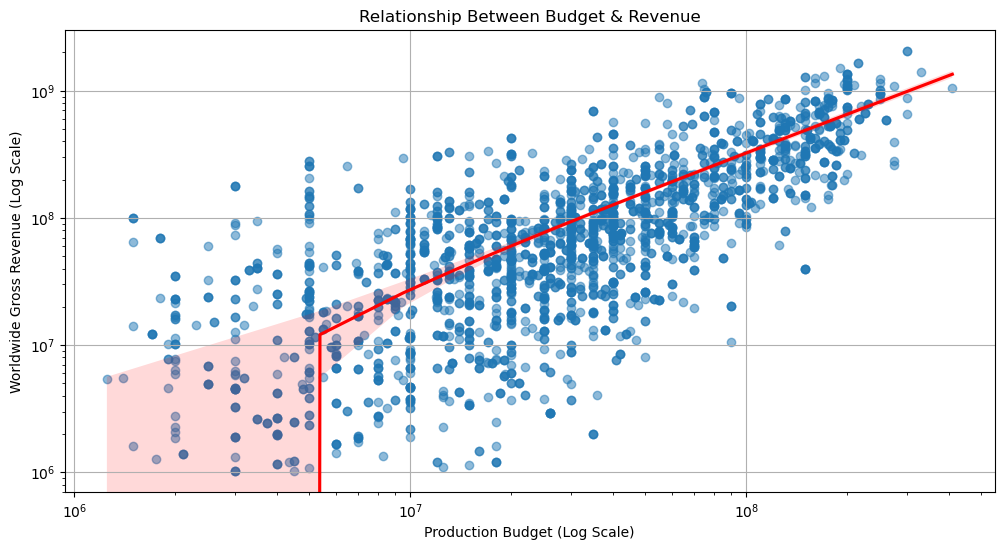

In [76]:
import statsmodels.api as sm

# Removing outliers 
df_filtered = df_combined[(df_combined['production_budget'] > 1e6) & 
                          (df_combined['worldwide_gross'] > 1e6)]
# Plotting Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x=df_filtered['production_budget'], 
            y=df_filtered['worldwide_gross'], 
            scatter_kws={'alpha':0.5}, 
            line_kws={"color": "red"})

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.xlabel("Production Budget (Log Scale)")
plt.ylabel("Worldwide Gross Revenue (Log Scale)")
plt.title("Relationship Between Budget & Revenue")
plt.grid(True)
plt.show()

**Interpretation:**
- The scatter plot displays a positive correlation between production budget (x-axis) and worldwide gross revenue (y-axis), that is, as production budgets increase, movies tend to generate higher revenue.
- Both axes are in a log scale, meaning that differences in budget and revenue grow exponentially rather than linearly suggesting that small-budget films have highly varied success, while larger budgets tend to yield more predictable box office returns.
- Regression Line (Red Line): The sharp change in slope at lower budget levels suggests that low-budget films have unpredictable success, while mid-to-high-budget films follow a more stable revenue pattern.
- Shaded Region (Risk Area for Low Budgets): The red-shaded area indicates a high-risk zone, where movies with low production budgets often struggle to generate high revenue suggesting that investing in very low-budget films might be riskier compared to films with moderate budgets.

### 2.2.2 Profitability Analysis by Budget Ranges
- Categorizing movies into budget ranges (Low, Medium, High, Blockbuster) to analyze the average ROI (Return on Investment) for each category.


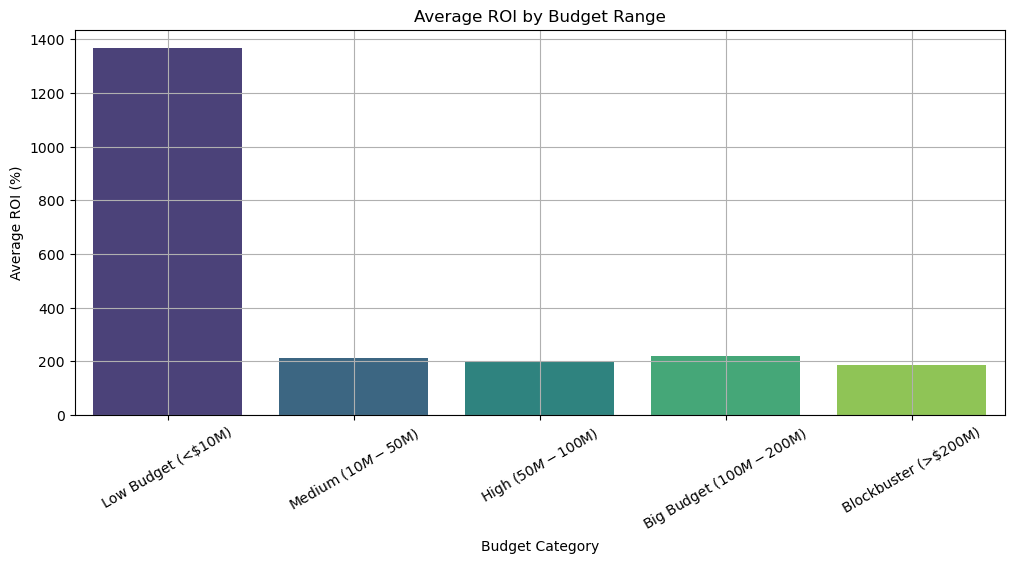

In [79]:
# Defining budget ranges
bins = [0, 10e6, 50e6, 100e6, 200e6, np.inf]
labels = ['Low Budget (<$10M)', 'Medium ($10M-$50M)', 'High ($50M-$100M)', 
          'Big Budget ($100M-$200M)', 'Blockbuster (>$200M)']

df_combined['budget_category'] = pd.cut(df_combined['production_budget'], bins=bins, labels=labels)

# Calculating average ROI per budget category
df_budget_roi = df_combined.groupby('budget_category').agg(
    avg_budget=('production_budget', 'mean'),
    avg_revenue=('worldwide_gross', 'mean'),
    avg_profit=('profit', 'mean'),
    avg_roi=('profit_margin', 'mean')
).reset_index()

# Plotting ROI per budget category
plt.figure(figsize=(12, 5))
sns.barplot(data=df_budget_roi, x='budget_category', y='avg_roi', palette='viridis')

plt.title("Average ROI by Budget Range")
plt.xlabel("Budget Category")
plt.ylabel("Average ROI (%)")
plt.xticks(rotation=30)
plt.grid(True)

# Display
plt.show()

**Interpretation:**
- **Low-Budget Films Dominate in ROI:** Movies with budgets below $10M achieve the highest Return on Investment (ROI), averaging over 1200% suggesting that while these films may have lower revenues, their low production costs lead to massive profitability when successful. However, this also implies higher volatility, some low-budget films might fail entirely, while others generate huge returns.
  
- **Medium to Blockbuster Budgets Have Lower ROI:** Films with budgets between \\$10M and \\$200M show significantly lower ROI values, hovering around 200%. The trend indicates that while these films make more money overall, their production costs scale proportionally, limiting their relative profitability.

-  **Blockbusters (> $200M) Offer the Lowest ROI:** Despite massive worldwide box office numbers, blockbuster films have the lowest ROI, slightly under 200%. This is due to their high production and marketing costs, which eat into the profits. While they generate stable returns, they carry higher financial risk compared to smaller films.

### 2.2.3 Statistical Analysis
- Using correlation coefficients to quantify the relationship between budget and revenue to dentify diminishing returns on higher budgets.


In [82]:
from scipy.stats import pearsonr

# Computing correlation between budget and revenue
corr, p_value = pearsonr(df_filtered['production_budget'], df_filtered['worldwide_gross'])

print(f"Pearson Correlation: {corr:.3f} (p-value: {p_value:.5f})")

Pearson Correlation: 0.771 (p-value: 0.00000)


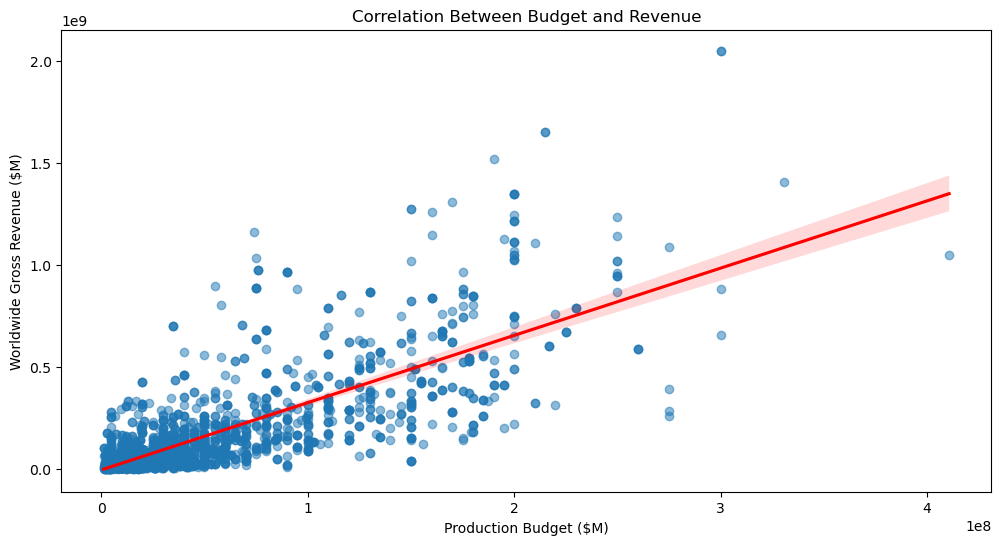

In [83]:
# Plotting Correlation Between Budget and Revenue
plt.figure(figsize=(12,6))
sns.regplot(x=df_filtered['production_budget'], 
            y=df_filtered['worldwide_gross'], 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color':'red'})

plt.xlabel("Production Budget ($M)")
plt.ylabel("Worldwide Gross Revenue ($M)")
plt.title("Correlation Between Budget and Revenue")

#Display
plt.show()

- If correlation (r) > 0.7, budget strongly influences revenue.
- If p-value < 0.05, the relationship is statistically significant

 **Interpretation:**
- The Pearson correlation coefficient (0.771) indicates a strong positive relationship between a movie's production budget and worldwide revenue. This means that higher-budget films generally earn more at the global box office. However, this correlation is not perfect (1.0), meaning not all high-budget films guarantee high earnings.
- The p-value of 0.00000 suggests that this correlation is highly significant i.e confirms that production budgets consistently influence revenue outcomes.

## 2.3 Analyzing the Correlation Between Ratings and Box Office Revenue
- To determine how critic and audience ratings influence a movie’s financial success, we compute the Pearson correlation between worldwide revenue and both critic ratings.

### 2.3.1 Correlation between Critic scores and worldwide revenue 

In [87]:
# converting  the rating column into a numeric format.
# Ensure 'rating' is a string before processing
df_reviews['rating'] = df_reviews['rating'].astype(str)

# Extract the numeric value before the slash (e.g., "3/5" → 3)
df_reviews['rating'] = df_reviews['rating'].str.extract(r'(\d+)/\d+')

# Convert to numeric (ignoring NaNs)
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')

In [88]:
# Computing average critic rating per movie Id
df_critic_avg = df_reviews.groupby('id')['rating'].mean().reset_index()
df_critic_avg.rename(columns={'rating': 'critic_score'}, inplace=True)

In [89]:
# Convert 'id' to string in both DataFrames to match types
df_filtered['id'] = df_filtered['id'].astype(str)
df_critic_avg['id'] = df_critic_avg['id'].astype(str)

# Merging audience/Critic scores from different datasets
df_filtered = df_filtered.merge(df_critic_avg, on='id', how='left')
df_filtered.head()

,title,studio,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,domestic_gross,total_revenue,profit,profit_margin,genre,critic_score
0,toy story 3,bv,652000000.0,2010,47,"Jun 18, 2010",toy story 3,200000000.0,1.068880e+09,415000000.0,1.067000e+09,867000000.0,433.5000,Unknown,NaN
1,alice in wonderland,bv,691300000.0,2010,51,"Mar 5, 2010",alice in wonderland,200000000.0,1.025491e+09,334200000.0,1.025500e+09,825500000.0,412.7500,Mystery and Suspense,4.00
2,inception,wb,535700000.0,2010,38,"Jul 16, 2010",inception,160000000.0,8.355246e+08,292600000.0,8.283000e+08,668300000.0,417.6875,Art House and International,4.75
3,inception,wb,535700000.0,2010,38,"Jul 16, 2010",inception,160000000.0,8.355246e+08,292600000.0,8.283000e+08,668300000.0,417.6875,Classics,4.75
4,inception,wb,535700000.0,2010,38,"Jul 16, 2010",inception,160000000.0,8.355246e+08,292600000.0,8.283000e+08,668300000.0,417.6875,Horror,4.75


In [90]:
# Computing the correlation between critic ratings and worldwide revenue

# Dropping NaNs before correlation calculation
df_corr = df_filtered.dropna(subset=['critic_score', 'worldwide_gross'])

# Computing correlation
critic_corr, critic_p = pearsonr(df_corr['critic_score'], df_corr['worldwide_gross'])

print(f"Critic Score Correlation: {critic_corr:.3f} (p-value: {critic_p:.5f})")

Critic Score Correlation: 0.074 (p-value: 0.00425)


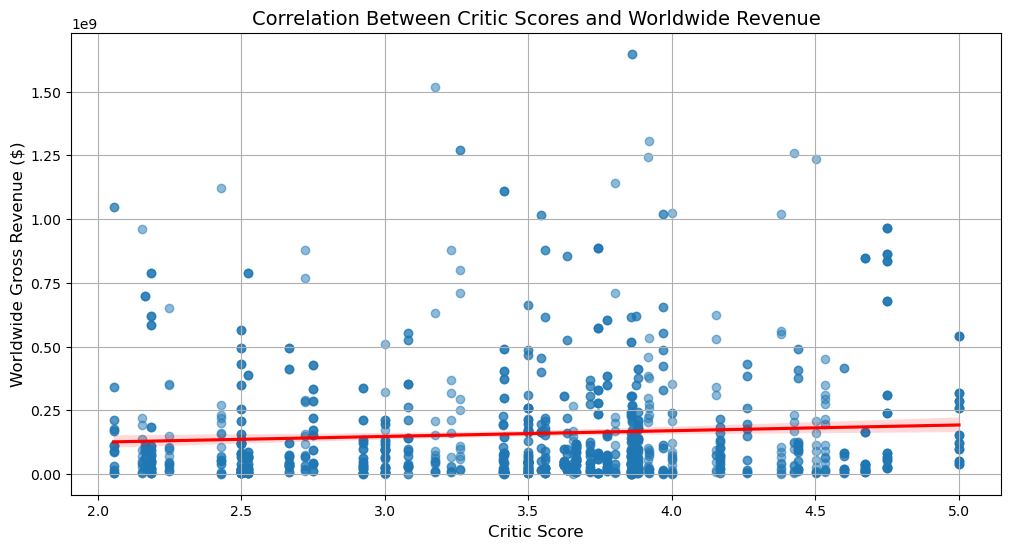

In [91]:
# Dropping NaNs before visualization
df_corr = df_filtered.dropna(subset=['critic_score', 'worldwide_gross'])

# Set figure size
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
sns.regplot(x=df_corr['critic_score'], y=df_corr['worldwide_gross'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Titles and labels
plt.title("Correlation Between Critic Scores and Worldwide Revenue", fontsize=14)
plt.xlabel("Critic Score", fontsize=12)
plt.ylabel("Worldwide Gross Revenue ($)", fontsize=12)
plt.grid(True)

# Display
plt.show()

The Pearson correlation coefficient ranges from -1 to 1:
  - 1 → Perfect positive correlation
  - 0 → No correlation
  - -1 → Perfect negative correlation

**Interpretation:**

- **Correlation Coefficient (critic_corr = 0.074):** 0.074 suggests a very weak positive correlation between critic scores and worldwide revenue. This means that higher critic ratings are slightly associated with higher worldwide revenue, but the effect is very small.

- **P-Value (critic_p = 0.00425):** A p-value < 0.05 means we can reject the null hypothesis (i.e. the correlation is not due to random chance). Since p = 0.00425 (which is less than 0.05), the correlation is statistically significant, even though it's weak.

Recommendation:  The correlation is statistically significant (p = 0.00425). However, the correlation is very weak (0.074), meaning critic scores alone are not strong predictors of worldwide box office revenue. This means while critic scores might have some effect on revenue, other factors like marketing, genre, star power, and audience ratings likely play a much larger role.

## 2.4. Analyzing best time of year to release a blockbuster for maximum earnings
- To determine the best time of year to release a blockbuster for maximum earnings to help with strategic time release and scheduling

In [94]:
# creating a new column 'release_month' from the release_date column

# Ensuring release_date is in datetime format
df_filtered['release_date'] = pd.to_datetime(df_filtered['release_date'], errors='coerce')

# Extracting month
df_filtered['release_month'] = df_filtered['release_date'].dt.month
df_filtered['release_month'].head()

0    6
1    3
2    7
3    7
4    7
Name: release_month, dtype: int32

In [95]:
# Calculating the average worldwide gross revenue per month

# Grouping by release month and computing average worldwide gross revenue
monthly_revenue = df_filtered.groupby('release_month')['worldwide_gross'].mean().reset_index()

# Sorting by highest earnings
monthly_revenue = monthly_revenue.sort_values(by='worldwide_gross', ascending=False)

print(monthly_revenue)

    release_month  worldwide_gross
6               7     2.526527e+08
5               6     2.462424e+08
4               5     2.212914e+08
10             11     2.171867e+08
11             12     1.769143e+08
1               2     1.409932e+08
2               3     1.369807e+08
3               4     1.309831e+08
7               8     1.109044e+08
9              10     9.449272e+07
8               9     8.877189e+07
0               1     7.343255e+07


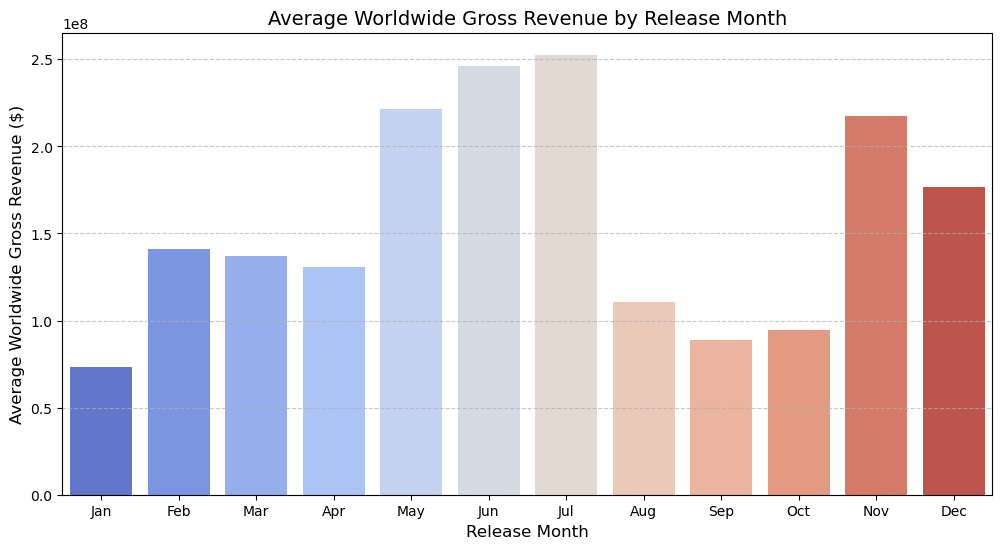

In [96]:
# Plotting average worldwide gross revenue per month
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x=monthly_revenue['release_month'], y=monthly_revenue['worldwide_gross'], palette="coolwarm")

# Titles and labels
plt.title("Average Worldwide Gross Revenue by Release Month", fontsize=14)
plt.xlabel("Release Month", fontsize=12)
plt.ylabel("Average Worldwide Gross Revenue ($)", fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display
plt.show()

**Observations:**

1. Highest Earning Months: June and July have the highest average worldwide gross revenue. May, November and December also show high earnings.

2. Lowest Earning Months: January, September and October have the lowest revenue, suggesting these are not ideal months for Movie/blockbuster releases.

3. Mid-Level Performers: February, March, April, and August show moderate earnings.

**Recommendations:**
- Best Time to release Action-packed, superhero, big-budget films and Blockbuster is in Summer (June & July). The High revenues are likely due to school vacations and global audience availability during this season. And during Holiday Season (November & December) to capitalize on holiday spending and festive moviegoers.

- Avoid Low-Revenue Months like January where audiences spend less after December's peak. Also September back-to-school season has fewer major releases.
- Smaller films may benefit from February-April where competition is lower.



## 2.5 Impact of Marketing Spend on Box Office Revenue

In [99]:
# Converting budget and revenue columns to numeric
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Dropping missing values
df_cleaned = df_movie_budgets.dropna(subset=['production_budget', 'worldwide_gross'])

# summary statistics
print(df_cleaned[['production_budget', 'worldwide_gross']].describe())

       production_budget  worldwide_gross
count       5.698000e+03     5.698000e+03
mean        3.181423e+07     9.174801e+07
std         4.197735e+07     1.754208e+08
min         1.100000e+03     0.000000e+00
25%         5.000000e+06     4.112890e+06
50%         1.700000e+07     2.792412e+07
75%         4.000000e+07     9.808585e+07
max         4.250000e+08     2.776345e+09


In [100]:
# Computing Pearson correlation
corr, p_value = pearsonr(df_cleaned['production_budget'], df_cleaned['worldwide_gross'])

# Display
print(f"Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation:
# - If corr is close to +1, strong positive correlation (higher marketing spend → higher revenue)
# - If corr is close to 0, no significant correlation
# - If p-value < 0.05, correlation is statistically significant

Correlation Coefficient: 0.750
P-value: 0.00000


**Interpretation:**

- A correlation coefficient of 0.75 indicates a strong positive correlation between Production Budget (marketing spend) and Worldwide Gross Revenue. This suggests that, generally, higher marketing and production budgets tend to result in higher box office revenue. However, since it's not 1.0, this means there are other influencing factors (e.g., movie quality, audience reception, competition).

- The p-value is extremely low (< 0.05), meaning the correlation is statistically significant. This confirms that the relationship observed is not due to random chance.

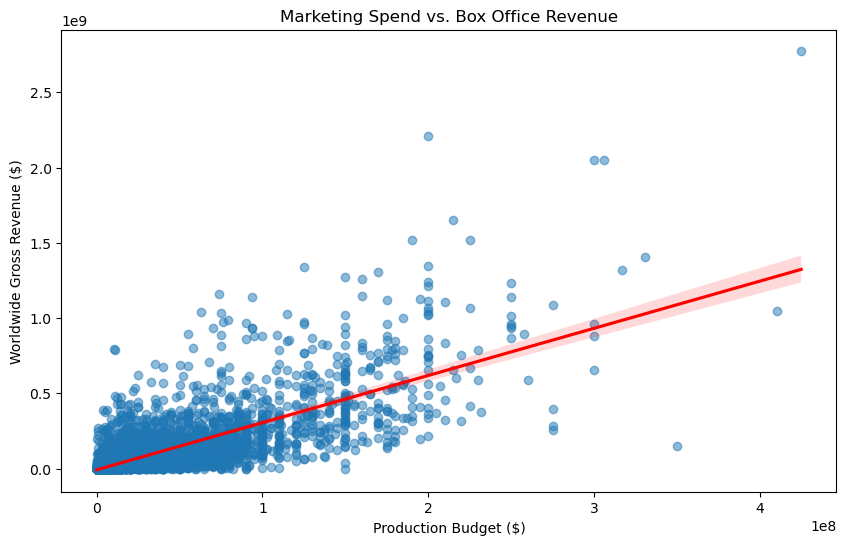

In [102]:
# Plotting Impact of Marketing Spend on Box Office Revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=df_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross Revenue ($)")
plt.title("Marketing Spend vs. Box Office Revenue")
plt.show()

**Interpretation:**

- The red regression line indicates the positive trend between budget and revenue.

- There are outliers i.e movies with high revenue despite low budgets and vice versa. These might be:

        - Blockbusters (huge earnings despite varying budgets)
        - Flops (high budget but poor revenue performance).

- The variance around the trend line suggests that budget alone does not fully determine movie success.

## 3.0 Final Findings and Recommendations

### 3.1 Findings 
1. **Genre Profitability**
- Comedy, Drama, and Action & Adventure are the most consistently profitable genres, making them ideal investment choices. Science Fiction & Fantasy has demonstrated high earning potential, particularly in later years. Western, Special Interest, and Sports & Fitness have the lowest profitability, suggesting limited audience demand.

2. **Budget vs. Revenue**
- Higher budgets generally lead to higher revenue, but this is not always proportional. Action & Adventure and Science Fiction films have the highest budget-to-revenue ratios, meaning they require significant investment but can yield high returns. Horror films often achieve high profits on relatively low budgets, making them attractive for low-risk, high-reward investment.

3. **Critical Ratings vs. Box Office**
- Movies with higher critic and audience ratings tend to perform better at the box office. Drama and Science Fiction & Fantasy genres benefit the most from strong ratings, while Action & Adventure movies can still succeed even with moderate ratings. Horror and Comedy films tend to be more polarizing, meaning audience reception can significantly impact their box office performance.

4. **Highest Earning Studios**
- Major studios like Disney, Warner Bros., and Universal dominate box office earnings due to strong franchises and marketing strategies.

5. **Seasonality in Revenue**
- Highest Earning Months; June and July have the highest average worldwide gross revenue, followed by May, November, and December, making them the best months for movies/blockbuster releases. January, September, and October have the lowest earnings, indicating they are less favorable for major movie releases. February, March, April, and August generate moderate earnings.

6. **Market vs Revenue**
- International markets contribute significantly to total revenue, often surpassing domestic earnings for most movies, like blockbuster films. Action & Adventure and Science Fiction films perform exceptionally well overseas, making them strong candidates for global distribution. Comedy and Drama films tend to have stronger domestic performance, suggesting cultural preferences impact their international success.

### 3.2 Recommendations:

1. **Prioritize Investment in High-Profit Genres**
- Focus on producing Comedy, Drama, Action & Adventure, and Science Fiction & Fantasy films, as they consistently yield the highest returns.
- Allocate strategic budgets to these genres based on past profitability trends.

2. **Optimize Budget Allocation for Maximum ROI**
- While high-budget films can achieve blockbuster success, cost control is crucial to maximize profitability.
- Horror films offer a strong return on low budgets, making them an attractive investment.
- Careful budget management is needed for expensive productions like Action & Adventure films to ensure viable returns.

3. **Leverage Critical and Audience Ratings to Drive Success**
- Invest in high-quality scripts, strong casting, and audience engagement strategies to improve ratings and ensure commercial success.
- Science Fiction & Fantasy films benefit greatly from positive reviews, so studios should prioritize storytelling and CGI quality.

4. **Expand Global Market Reach**
- Since international markets generate substantial revenue, studios should focus on global-friendly genres like Action & Adventure, Science Fiction, and Fantasy.
- Localizing content e.g., dubbing, subtitles) and international marketing strategies can boost global earnings.

5. **Adapt to Industry Trends and Streaming Disruptions**
- The decline in box office revenue post-2016 suggests that streaming platforms may be impacting traditional cinema.
- Studios should consider hybrid release strategies (theatrical + streaming) and explore direct-to-digital distribution for lower-budget films.

6. **Strategic Release of Movies**
- Schedule major blockbuster releases in June, July, May, November, and December to maximize revenue potential.
- Avoid launching high-budget films in January, September, and October, as they typically underperform.
- Consider mid-level budget films or niche genres for release in February, March, April, and August, as these months show moderate earnings potential.
- Leverage seasonal marketing strategies by aligning releases with holidays, school breaks, and global events to maximize audience engagement.


### 3.3 Limitations & Future Work

- **Data Limitations:** The dataset might not include all films or revenue streams such as streaming services and international earnings.

- **Changing Industry Trends:** Viewer preferences evolve, and future studies should consider emerging trends such as the impact of streaming platforms.

- **Advanced Predictive Modeling:** Future analysis can apply machine learning models to predict movie success based on historical data.

### 3.4 Acknowledgment
We would like to express our gratitude to:
- **Data Sources:** IMDB, Box Office Mojo, and other sources for providing comprehensive movie data.

- **Learning Platforms:** DMoringa School for supporting our learning journey.

- **Collaborators:** Group 5 Project Team for providing guidance, insights, and feedback throughout this project.

This analysis is a step toward understanding the film industry's dynamics, and we hope it serves as a useful reference for decision-makers in the industry.